In [1]:
import os
from astropy.io import ascii as asc
from astropy.time import Time
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import astropy.units as u
import supernova as sn

from astropy.modeling import fitting, models

# Length of S2

In [2]:
tbdata = asc.read('../data/asassn15oz_bolo_UBgVrRiI.txt', names=['phase', 'logL', 'err'])

In [3]:
sn15oz = sn.LightCurve2('asassn-15oz')
sn15oz.get_photometry('V')
sn15oz.get_slope('s2')
Time(sn15oz.jdexpl, format='jd').iso

'2015-08-27 12:00:00.000'

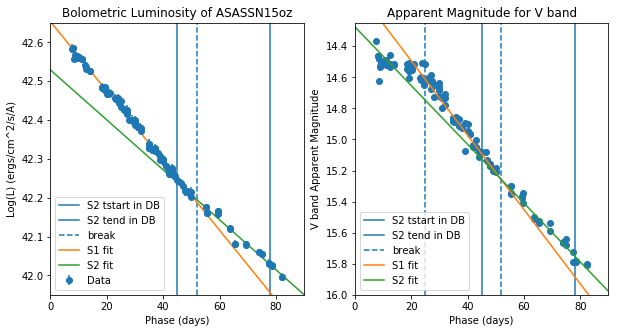

In [4]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1,2,1)
ax1.errorbar(tbdata['phase'], tbdata['logL'], tbdata['err'], marker='o', linestyle='none', label='Data')

ax1.axvline(sn15oz.slopes['s2_range']['V'][0] - sn15oz.jdexpl, label='S2 tstart in DB')
ax1.axvline(sn15oz.slopes['s2_range']['V'][1] - sn15oz.jdexpl, label='S2 tend in DB')
ax1.axvline(52, linestyle='--', label='break')
lin_model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
s1_indx = tbdata['phase']<52
s1_fit = fitter(lin_model, tbdata['phase'][s1_indx], tbdata['logL'][s1_indx], weights=1/tbdata['err'][s1_indx])
phase = np.arange(100)
ax1.plot(phase, s1_fit(phase), label='S1 fit')

s2_indx = (tbdata['phase']>52) & (tbdata['phase']<100)
s2_fit = fitter(lin_model, tbdata['phase'][s2_indx], tbdata['logL'][s2_indx], weights=1/tbdata['err'][s2_indx])
ax1.plot(phase, s2_fit(phase), label='S2 fit')
ax1.set_xlim(0, 90)
ax1.set_ylim(41.95, 42.65)

ax1.set_title('Bolometric Luminosity of ASASSN15oz')
ax1.set_xlabel("Phase (days)")
ax1.set_ylabel('Log(L) (ergs/cm^2/s/A)')
ax1.legend(loc='best')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(sn15oz.jd['V']-sn15oz.jdexpl, sn15oz.apparent_mag['V'], 'o')
ax2.set_xlim(0, 90)
ax2.set_ylim(16, 14.25)
ax2.axvline(sn15oz.slopes['s2_range']['V'][0] - sn15oz.jdexpl, label='S2 tstart in DB')
ax2.axvline(sn15oz.slopes['s2_range']['V'][1] - sn15oz.jdexpl, label='S2 tend in DB')
ax2.axvline(52, linestyle='--', label='break')
ax2.axvline(25, linestyle='--')

s1_indx = (sn15oz.jd['V']-sn15oz.jdexpl<52)&(sn15oz.jd['V']-sn15oz.jdexpl>25)
s1_fit_V = fitter(lin_model, sn15oz.jd['V'][s1_indx]-sn15oz.jdexpl, sn15oz.apparent_mag['V'][s1_indx], weights=1/sn15oz.apparent_mag_err['V'][s1_indx])
phase = np.arange(100)
ax2.plot(phase, s1_fit_V(phase), label='S1 fit')

s2_indx = (sn15oz.jd['V']-sn15oz.jdexpl>52)&(sn15oz.jd['V']-sn15oz.jdexpl<100)
s2_fit_V = fitter(lin_model, sn15oz.jd['V'][s2_indx]-sn15oz.jdexpl, sn15oz.apparent_mag['V'][s2_indx], weights=1/sn15oz.apparent_mag_err['V'][s2_indx])
phase = np.arange(100)
ax2.plot(phase, s2_fit_V(phase), label='S2 fit')
ax2.set_xlabel('Phase (days)')
ax2.set_ylabel('V band Apparent Magnitude')
ax2.set_title('Apparent Magnitude for V band')
ax2.legend(loc='best')

## Zoom in on intersection

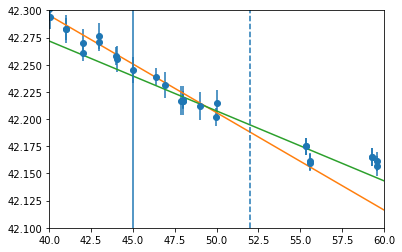

In [5]:
plt.errorbar(tbdata['phase'], tbdata['logL'], tbdata['err'], marker='o', linestyle='none', label='Data')
plt.plot(phase, s1_fit(phase), label='S1 fit')
plt.plot(phase, s2_fit(phase), label='S2 fit')
plt.xlim(40, 60)
plt.ylim(42.1, 42.3)
plt.axvline(sn15oz.slopes['s2_range']['V'][0] - sn15oz.jdexpl, label='S2 tstart in DB')
plt.axvline(sn15oz.slopes['s2_range']['V'][1] - sn15oz.jdexpl, label='S2 tend in DB')
plt.axvline(52, linestyle='--', label='break')

If I make the break at 52, then the intersection of the two lines is around 47.5, if I change the break to be at 47.5, then the intersection moves to 50, so I think **50 is a fine place to set the beginning of the region not affected by CSM interaction**

# Fitting the Ni and end of Plateau

Parameter('slope', value=-0.006457813369659796) Parameter('slope', value=-0.005793851857837738)


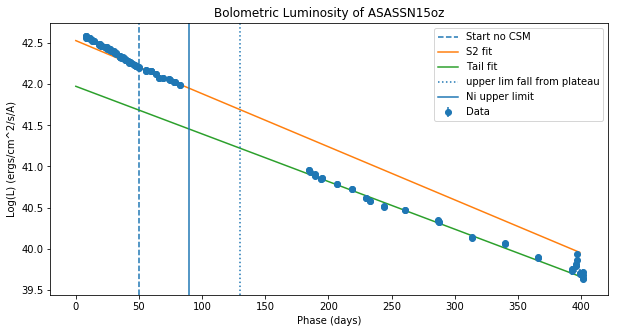

In [6]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1,1,1)
ax1.errorbar(tbdata['phase'], tbdata['logL'], tbdata['err'], marker='o', linestyle='none', label='Data')

ax1.axvline(50, linestyle='--', label='Start no CSM')
lin_model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
phase = np.arange(400)
s2_indx = (tbdata['phase']>50) & (tbdata['phase']<100)
s2_fit = fitter(lin_model, tbdata['phase'][s2_indx], tbdata['logL'][s2_indx], weights=1/tbdata['err'][s2_indx])
ax1.plot(phase, s2_fit(phase), label='S2 fit')

tail_indx = (tbdata['phase']>100) & (tbdata['phase']<375)
tail_fit = fitter(lin_model, tbdata['phase'][tail_indx], tbdata['logL'][tail_indx], weights=1/tbdata['err'][tail_indx])
ax1.plot(phase, tail_fit(phase), label='Tail fit')
ax1.axvline(130, linestyle=':', label='upper lim fall from plateau')

ax1.axvline(90, label='Ni upper limit')
ax1.set_title('Bolometric Luminosity of ASASSN15oz')
ax1.set_xlabel("Phase (days)")
ax1.set_ylabel('Log(L) (ergs/cm^2/s/A)')
ax1.legend(loc='best')


print(s2_fit.slope,tail_fit.slope)

From Stefano's paper, if s50_v is 1.09 mag/50day then from figure 5a, **the upper limit on the fall from plateau would be 130 days**

The maximum nickel would be if the fall from plateau occurred right after the last point before the break. Since this is an upper limit I'm going to assume the fall from plateau is instantaneous

In [7]:
lc_tbdata = asc.read('../data/tpt3_bolo.txt', data_start=1)

-0.087248826
88.3845107935


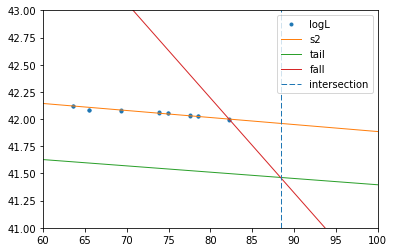

In [8]:
w0_avg = -np.median(lc_tbdata['w0'])/50.
print(w0_avg)
intercept_fall = tbdata['logL'][s2_indx][-1] - w0_avg*tbdata['phase'][s2_indx][-1]
fall_fit = models.Linear1D(slope=w0_avg, intercept = intercept_fall)

tail_indx = (tbdata['phase']>100) & (tbdata['phase']<375)
tail_fit = fitter(lin_model, tbdata['phase'][tail_indx], tbdata['logL'][tail_indx], weights=1/tbdata['err'][tail_indx])

phase = np.arange(400)
plt.plot(tbdata['phase'], tbdata['logL'], 'o')
plt.plot(phase, s2_fit(phase), label='s2')
plt.plot(phase, tail_fit(phase), label='tail')
plt.plot(phase, fall_fit(phase), label='fall')
plt.ylim(41, 43)
plt.xlim(60, 100)
intersection = (tail_fit.intercept - fall_fit.intercept)/(fall_fit.slope - tail_fit.slope)
print(intersection)
plt.axvline(intersection, linestyle='--', label='intersection')
plt.legend(loc='best')


In [8]:
len(lc_tbdata)

30

In [4]:
s2_indx = (tbdata['phase']>50) & (tbdata['phase']<100)
s2_fit = fitter(lin_model, tbdata['phase'][s2_indx], tbdata['logL'][s2_indx], weights=1/tbdata['err'][s2_indx])

tail_indx = (tbdata['phase']>100) & (tbdata['phase']<375)
tail_fit = fitter(lin_model, tbdata['phase'][tail_indx], tbdata['logL'][tail_indx], weights=1/tbdata['err'][tail_indx])

extrap_phase = np.arange(intersection, tbdata['phase'][tail_indx][0]-10, 5)
extrap_points = tail_fit(extrap_phase)

phase = np.arange(400)
plt.plot(tbdata['phase'], tbdata['logL'], 'o', label='logL', markersize=5)
plt.plot(extrap_phase, extrap_points, 'o', label='extrap_pts', markersize=5)
plt.plot(phase, s2_fit(phase), label='s2')
plt.plot(phase, tail_fit(phase), label='tail')
plt.plot(phase, fall_fit(phase), label='fall')
plt.ylim(41, 43)
plt.xlim(60, 200)
plt.legend(loc='best')

new_tbdata = Table([extrap_phase, extrap_points, np.zeros(len(extrap_phase))], names = ['phase', 'logL', 'err'])

combine_tbdata = vstack([tbdata, new_tbdata])
combine_tbdata.sort(['phase'])

combine_tbdata.write('../data/bolo_lum_with_extra_data.txt', 
                     format='ascii.fixed_width_no_header', 
                     delimiter='\t', 
                     overwrite=True)

NameError: name 'fitter' is not defined

# Extend 87A tail to earlier epoch

In [12]:
sn87A_tbdata = asc.read('../../not_my_code/sndavis/data/1987A_bolo_UBVRI.txt',
                       names=['phase', 'logL', 'err'])

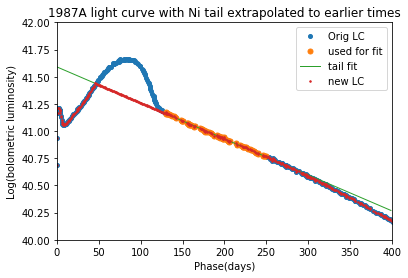

In [39]:
plt.plot(sn87A_tbdata['phase'], sn87A_tbdata['logL'], 'o', markersize=4, label='Orig LC')
tail_indx87 = (sn87A_tbdata['phase']>130) & (sn87A_tbdata['phase']<250)
plt.xlim(0, 400)
plt.ylim(40, 42)
plt.plot(sn87A_tbdata['phase'][tail_indx87], sn87A_tbdata['logL'][tail_indx87], 'o', markersize=5, label='used for fit')
mod87A = models.Linear1D()
fit87A = fitter(mod87A, sn87A_tbdata['phase'][tail_indx87], sn87A_tbdata['logL'][tail_indx87])
phase = np.arange(400)
plt.plot(phase, fit87A(phase), label='tail fit')
new_tbdata87 = Table([phase[45:130], fit87A(phase[45:130]), np.zeros(len(phase[45:130]))],
                     names=['phase', 'logL', 'err'])
indx = (sn87A_tbdata['phase']<45) | (sn87A_tbdata['phase']>130)
combined_tbdata87 = vstack([sn87A_tbdata[indx], new_tbdata87])
combined_tbdata87.sort(['phase'])
combined_tbdata87.write('../data/bol_lum_1987A_extrap.txt', format='ascii.fixed_width_no_header', overwrite=True, delimiter='\t')
plt.plot(combined_tbdata87['phase'], combined_tbdata87['logL'], '.', label='new LC')
plt.legend(loc='best')
plt.title('1987A light curve with Ni tail extrapolated to earlier times')
plt.xlabel('Phase(days)')
plt.ylabel('Log(bolometric luminosity)')

python -i  measure_nickelwith87A.py -f -d  '/Users/bostroem/Desktop/research/asassn15oz/data/' --ref '/Users/bostroem/Desktop/research/asassn15oz/data/bol_lum_1987A_extrap.txt' 'bolo_lum_with_extra_data.txt'

# Sandbox for chisq script

In [2]:
sn15oz = sn.LightCurve2('asassn15oz')

In [3]:
sn15oz.get_photometry()

In [4]:
sn15oz.get_abs_mag()

In [7]:
import sys
sys.path.append('/Users/bostroem/Desktop/research/not_my_code/SNEC-1.01')
import chisq_analysis

In [8]:
model_dir = '/Users/bostroem/Desktop/research/snec_models/asassn15oz/mixing_5.0/M17/E_1.1/Data'

In [9]:
model_mag_tbdata = chisq_analysis.prepare_model_data(model_dir)

(-14, -18.5)

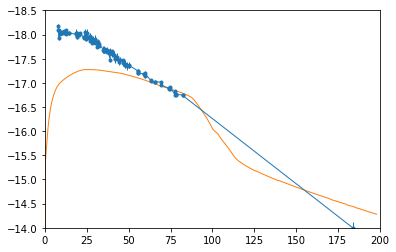

In [14]:
plt.errorbar(sn15oz.phase['V'], sn15oz.abs_mag['V'], sn15oz.abs_mag_err['V'], marker='o')
plt.plot(model_mag_tbdata['time'], model_mag_tbdata['V'])
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(0, 200)
ax.set_ylim(-14, -18.5)

In [13]:
sn15oz.slopes['s2']['V']*50

0.985059302765